In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
import time

%matplotlib inline

In [4]:
plt.style.use('dark_background')

# Read in h5ad files

In [5]:
region_0_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 0\region_0_scdata.h5ad")
region_1_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 1\Region 1_scdata.h5ad")
region_2_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 2\Region 2_scdata.h5ad")
region_3_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Region 3\Region 3_scdata.h5ad")

In [51]:
concated_scdata = sc.concat([region_0_scdata, region_1_scdata, region_2_scdata, region_3_scdata])
concated_scdata

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 344687 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden'
    obsm: 'X_pca', 'X_spatial', 'X_umap'

In [52]:
# Generate umap
#sc.pp.log1p(concated_scdata)
#sc.pp.normalize_total(concated_scdata)
#sc.pp.scale(concated_scdata, zero_center = True)
sc.pp.pca(concated_scdata, n_comps = 50, random_state = 42)
umap_operator = umap.UMAP(n_components = 2, random_state = 42, metric = 'euclidean', min_dist = 0.01)
umap_result_cosmx = umap_operator.fit_transform(concated_scdata.obsm['X_pca'])
concated_scdata.obsm['X_umap'] = umap_result_cosmx
sc.pp.neighbors(concated_scdata, use_rep = 'X_umap', n_neighbors = 20)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [53]:
sc.tl.leiden(concated_scdata, resolution = 0.025)

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


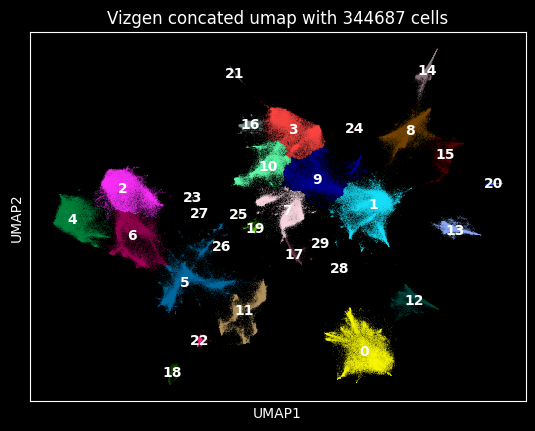

In [54]:
sc.pl.umap(concated_scdata, 
           color = 'leiden', 
           legend_loc = 'on data', 
           title = f'Vizgen concated umap with {len(concated_scdata.obs)} cells')

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


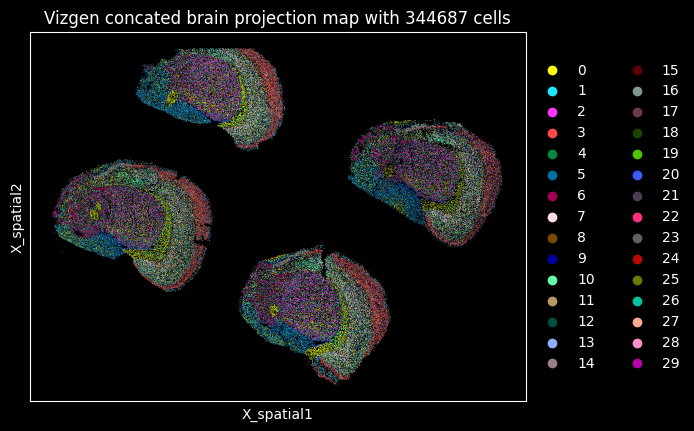

In [55]:
sc.pl.embedding(concated_scdata,
               basis = 'X_spatial',
               color = 'leiden', 
               title = f'Vizgen concated brain projection map with {len(concated_scdata.obs)} cells')

In [57]:
concated_scdata.write(r'D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Vizgen_scdata.h5ad')

### Generate cell type labelings

##### Load allen brain atlas trimmed means

In [58]:
fl = r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\allen_brain_atlas_trimmed_means.csv"
aba = pd.read_csv(fl)
#list(aba.columns)
aba_column_list = list(aba.columns)

In [59]:
aba_column_list = list(aba.columns)
#aba_column_list

In [60]:
aba_column_list_revised = ['feature']
for i in range(1,len(aba_column_list)):
    aba_column_list_revised.append(aba_column_list[i].split('_')[1])
#aba_column_list_revised

In [61]:
aba.columns = aba_column_list_revised
#aba.to_csv(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\allen_brain_atlas_trimmed_means.csv", index = False)
aba

,feature,Pvalb,L6 IT CTX,Ntng1 HPF,Sst,Lamp5 Lhx6,Pvalb,CA2-IG-FC,Car3,CA1-do,...,Vip,L4/5 IT CTX,L5/6 IT CTX,CA1,L5 PT CTX,ProS,L4 IT CTX,L6 CT CTX,Astro,L6 CT ENT
0,0610005C13Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0610007P14Rik,6.149091,6.844643,6.503429,6.368064,6.716667,6.123093,6.8675,7.097313,6.410685,...,6.494454,6.175000,6.520834,6.937000,6.227551,6.77750,6.451691,6.607911,7.525000,6.529638
3,0610009B22Rik,6.393636,6.366785,6.951667,6.568254,6.811984,6.551165,5.9700,6.389925,6.239452,...,6.431515,5.994375,6.242500,6.505333,6.221458,6.59125,6.113125,6.669403,1.761538,6.052993
4,0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.085833,0.000000,0.000000,0.000000,0.05200,0.000000,0.077822,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45763,n-R5s142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
45764,n-R5s143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
45765,n-R5s144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
45766,n-R5s146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [62]:
def generate_cell_type(xenium_scdata_revised_rescaled, aba):
    #sc.pp.log1p(xenium_scdata_revised_rescaled.X)
    sc.tl.rank_genes_groups(xenium_scdata_revised_rescaled, groupby = 'leiden', method = 'wilcoxon', use_raw = False)
    gene_expression_df = pd.DataFrame()
    for cluster in xenium_scdata_revised_rescaled.obs['leiden'].cat.categories:
        cluster_gene_name = xenium_scdata_revised_rescaled.uns['rank_genes_groups']['names'][cluster]
        cluster_gene_score = xenium_scdata_revised_rescaled.uns['rank_genes_groups']['scores'][cluster]
        gene_expression_df[cluster] = {key: val for key, val in zip(cluster_gene_name, cluster_gene_score)}
    gene_expression_df.index = gene_expression_df.index.map(str.capitalize)
    gene_expression_df = gene_expression_df.T
    genes_list = gene_expression_df.columns.tolist()
    #comparison_df = ref_df[ref_df['feature'].isin(genes_list)].reset_index().drop(columns = ['index']).set_index('feature')
    comparison_df = aba[aba['feature'].isin(genes_list)].reset_index().drop(columns = ['index']).set_index('feature').T
    comparison_df = comparison_df.groupby(comparison_df.index).mean().T
    gene_expression_df_postprocessed = gene_expression_df.loc[:, gene_expression_df.columns.isin(comparison_df.index)]
    update_list_genes = np.array(gene_expression_df_postprocessed.columns)
    scdata_subset = xenium_scdata_revised_rescaled[:, xenium_scdata_revised_rescaled.var_names.isin(update_list_genes)].copy()
    #scdata_subset.X_expand = scdata_subset.X.toarray()
    scdata_subset.X_expand = scdata_subset.X
    X_MERFISH_zscored = zscore(scdata_subset.X_expand, axis=0)
    clusters = scdata_subset.obs['leiden']
    uclusters = np.unique(clusters)
    X_MERFISH_zscored_per_cluster = np.array([np.mean(X_MERFISH_zscored[cl==clusters],axis=0) for cl in uclusters])
    #X_seq = np.array(comparison_df.iloc[:,1:]).T
    X_seq = np.array(comparison_df.iloc[:,0:]).T
    X_seq[np.isnan(X_seq)]=0
    X_seq_zscored = zscore(X_seq,axis=0)
    X_seq_zscored[np.isnan(X_seq_zscored)]=0
    Mcor = [[np.corrcoef(clMER,clSEQ)[0,1] for clSEQ in X_seq_zscored] for clMER in X_MERFISH_zscored_per_cluster]
    #names_seq = list(comparison_df.keys())[1:]
    names_seq = list(comparison_df.keys())[0:]

    Mcor_t = np.array(Mcor).T

    plt.style.use('dark_background')
    #plt.figure(figsize=(120,200))
    plt.figure(figsize=(15,25))
    #plt.imshow(xenium_Mcor,cmap='bwr')
    plt.imshow(Mcor_t,cmap='bwr')
    plt.yticks(np.arange(len(names_seq)),names_seq,rotation=35,ha='right');
    #plt.yticks(np.arange(len(uclusters)),[(ucl,dic_rename[ucl])for ucl in uclusters]);
    plt.xticks(np.arange(len(uclusters)),uclusters)
    plt.xlabel('Cell Clusters from our MERFISH in mouse cortex', size=30)
    plt.ylabel('Cell Clusters from sn-RNASeq in mouse cortex \n(Allan Brian Atlas)', size=30);
    plt.tick_params(axis='x', top=True)
    plt.gca().xaxis.set_ticks_position('top')
    plt.gca().xaxis.set_label_position('top')

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:422: RuntimeWarning: inv

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


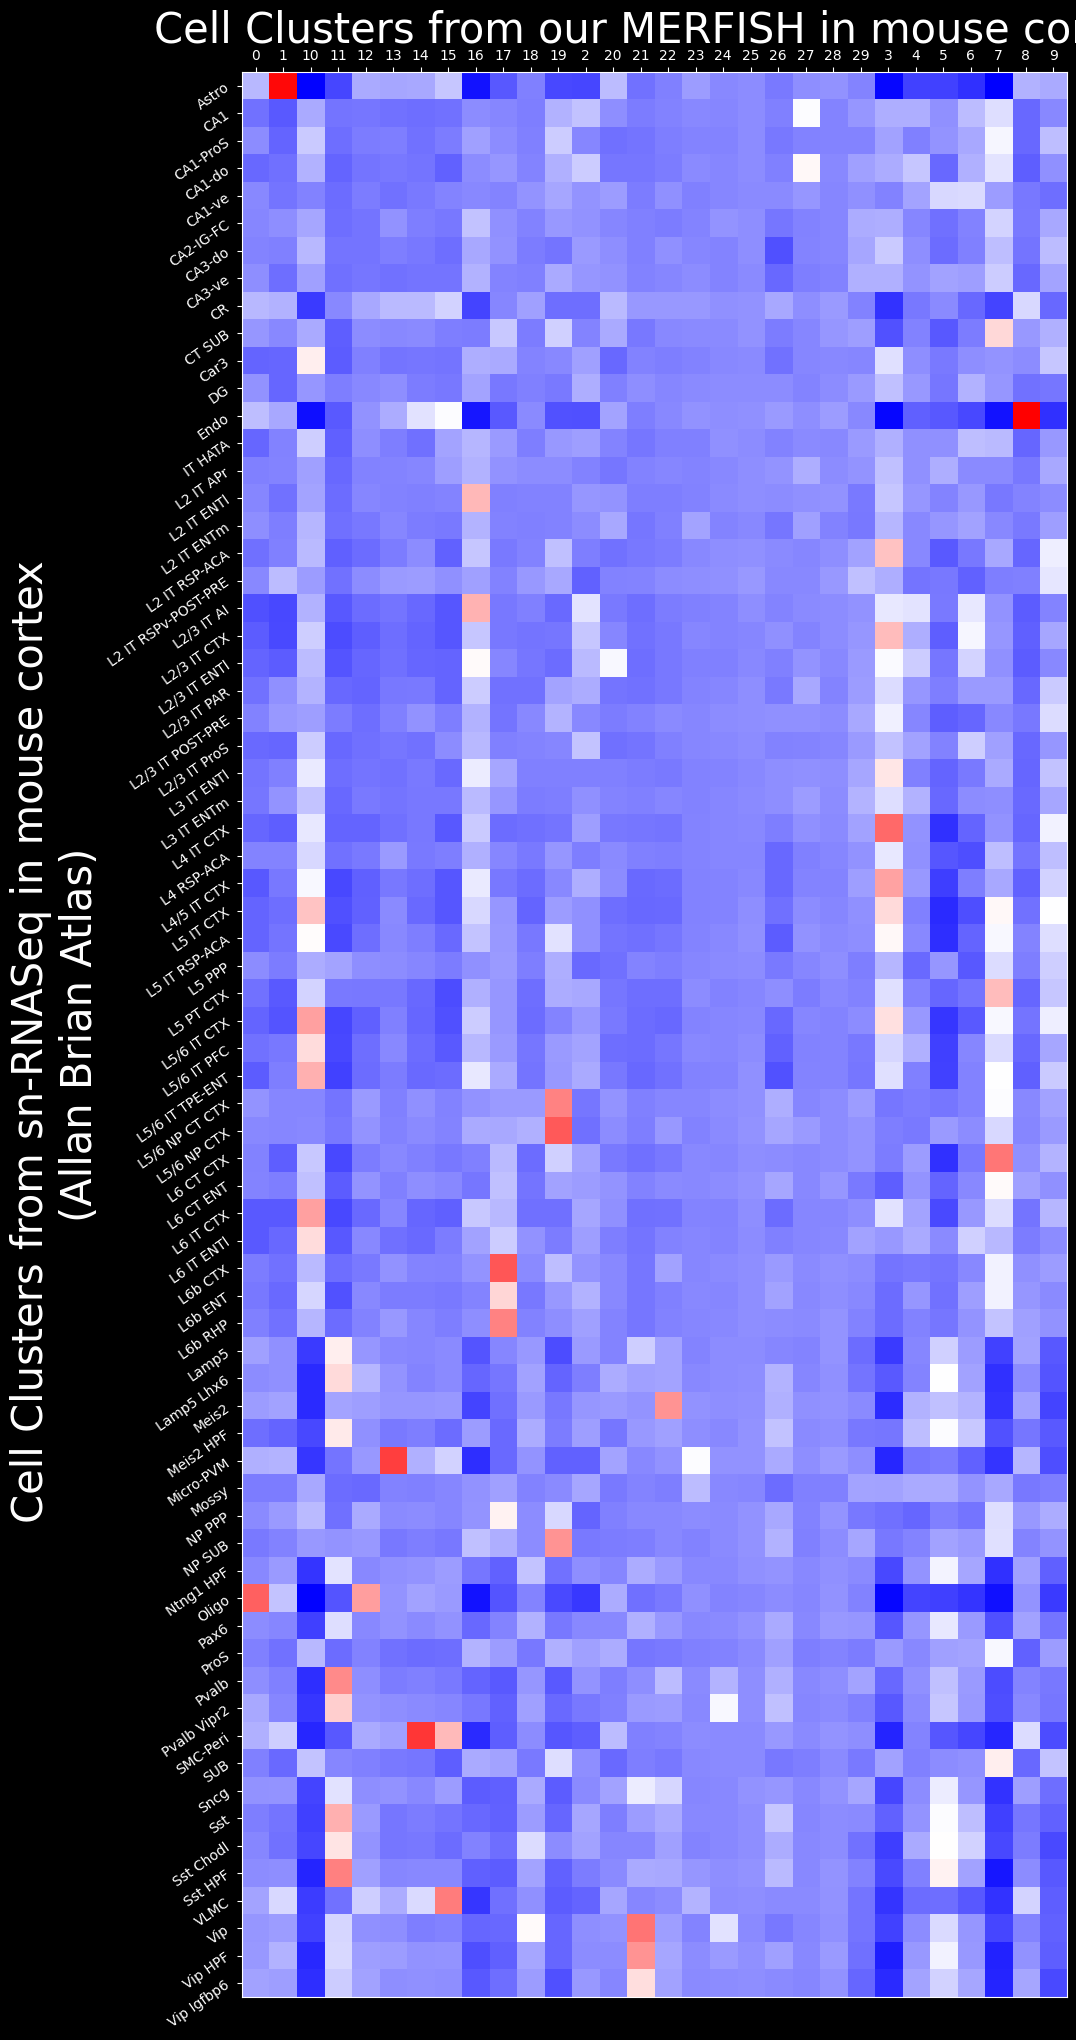

In [63]:
generate_cell_type(concated_scdata, aba)

In [65]:
concated_scdata_cluster_name_mapping = {
    '0': 'Oligo',
    '1': 'Astro',
    '2': 'CLUSTER 2',
    '3': 'L4 IT CTX',
    '4': 'CLUSTER 4',
    '5': 'CLUSTER 5',
    '6': 'CLUSTER 6',
    '7': 'L6 CT CTX',
    '8': 'Endo',
    '9': 'CLUSTER 9',
    '10': 'IT CTX',
    '11': 'Pvalb / Sst',
    '12': 'Oligo',
    '13': 'Micro-PVM',
    '14': 'SMC-Peri',
    '15': 'VLMC',
    '16': 'IT ENTI / IT AI',
    '17': 'L6b CTX',
    '18': 'CLUSTER 18',
    '19': 'L5/6 NP CTX',
    '20': 'CLUSTER 20',
    '21': 'VIP',
    '22': 'Meis2',
    '23': 'CLUSTER 23',
    '24': 'CLUSTER 24',
    '25': 'CLUSTER 25',
    '26': 'CLUSTER 26',
    '27': 'CLUSTER 27',
    '28': 'CLUSTER 28',
    '29': 'CLUSTER 29'
}

In [66]:
# Convert category keys in the dictionary to strings
concated_scdata_cluster_name_mapping = {str(k): v for k, v in concated_scdata_cluster_name_mapping.items()}

# Map cluster IDs to cluster names using the updated dictionary
concated_scdata.obs['cluster_names'] = concated_scdata.obs['leiden'].astype(str).map(concated_scdata_cluster_name_mapping)


C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


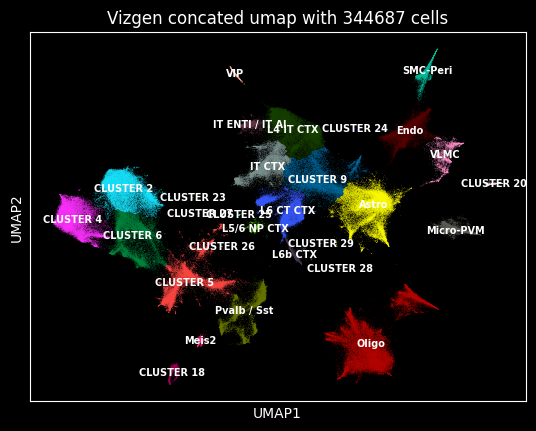

In [71]:
sc.pl.umap(concated_scdata, 
           color = 'cluster_names', 
           legend_loc = 'on data', 
           title = f'Vizgen concated umap with {len(concated_scdata.obs)} cells', 
           legend_fontsize = 7)
        

In [ ]:
sc.pl.umap(concated_scdata, 
           basis = 'X_spatial',
           color = 'cluster_names',  
           title = f'Vizgen brain projeciton map with {len(concated_scdata.obs)} cells', 
           legend_fontsize = 10)